In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:

url = 'https://query1.finance.yahoo.com/v7/finance/download/%5ENSEI?period1=1420070400&period2=1577836800&interval=1d&events=history'

## Reading and dispalying the csv file
file = pd.read_csv (url, index_col = 'Date')
pd.options.display.max_columns = None
pd.options.display.max_rows = None
file=file.dropna()

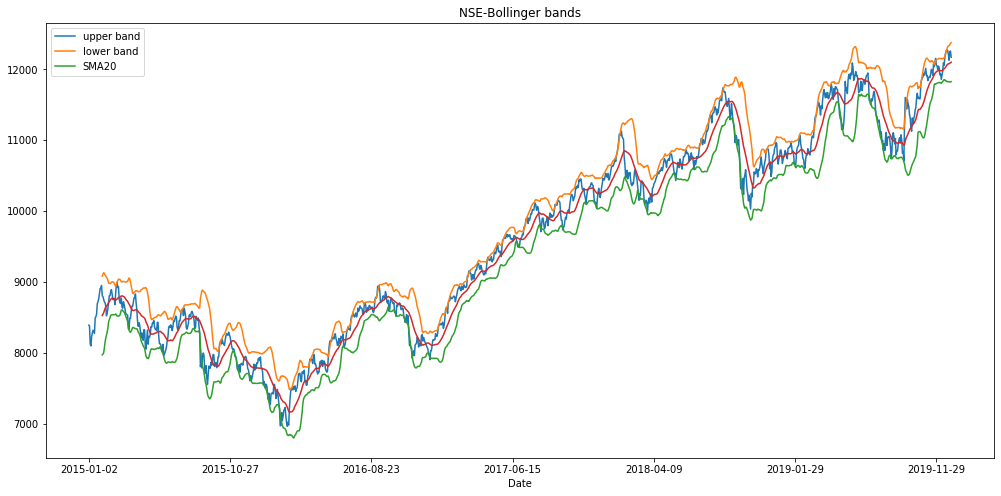

In [3]:
# calculation of Bolinger Bands and plotting
plt.figure(figsize=(15,8))
file['Close'].plot()
plt.title('NSE-Bollinger bands')
file['upper band'] = file['Close'].rolling(20).mean()+file['Close'].rolling(20).std()*2
file['lower band'] = file['Close'].rolling(20).mean()-file['Close'].rolling(20).std()*2
file['upper band'].plot(figsize=(17,8), legend = True)
file['lower band'].plot(figsize=(17,8), legend = True)
file['SMA20'] = file['Close'].rolling(20).mean()
file['SMA20'].plot(figsize=(17,8), legend = True)

In [4]:
# signal 1 or 0 and -1
file['diff'] =file['Close']-file['upper band']
file['diff_1']=file['lower band']-file['Close']
file['Indicator'] = ((file['diff']> 0) & (file['diff'].shift(1) < 0))
file['temp_Indicator'] = ((file['diff_1'] < 0) & (file['diff_1'].shift(1) > 0))*-1
file['Indicator']=file['Indicator']+file['temp_Indicator']
file['Indicator'] = file['Indicator'].astype(int)

In [5]:
# Dates where POSITIVE cross-over is happening
file[file['Indicator'] == -1].index

Index(['2015-03-27', '2015-08-27', '2015-11-06', '2015-11-16', '2015-12-10',
       '2016-01-19', '2016-02-15', '2016-09-30', '2016-10-14', '2016-10-18',
       '2016-11-07', '2016-11-18', '2016-11-22', '2016-12-23', '2016-12-27',
       '2017-06-29', '2017-08-14', '2017-09-28', '2018-03-08', '2018-03-20',
       '2018-05-22', '2018-05-24', '2018-09-12', '2018-09-25', '2018-10-09',
       '2019-05-14', '2019-07-11', '2019-08-23'],
      dtype='object', name='Date')

In [6]:
# Dates where NEGATIVE cross-over is happening
file[file['Indicator'] == 1].index

Index(['2015-07-16', '2015-10-05', '2016-04-13', '2016-05-26', '2016-07-04',
       '2016-07-11', '2016-08-08', '2016-08-30', '2016-09-02', '2017-01-11',
       '2017-01-25', '2017-02-01', '2017-03-14', '2017-04-26', '2017-05-26',
       '2017-07-10', '2017-09-12', '2018-01-15', '2018-01-17', '2018-01-19',
       '2018-07-10', '2018-08-27', '2018-11-29', '2019-02-06', '2019-03-11',
       '2019-09-20', '2019-11-27', '2019-12-18'],
      dtype='object', name='Date')

In [7]:
#mean absolute return FOR the next 10 days
file['Mean_Return_NXT_10D']=abs(file['Close'].rolling(10).mean().shift(-10)/file['Close']-1)
file=file[['Close','Mean_Return_NXT_10D','Indicator']]


In [9]:
#final df
file=file.dropna()
file

,Close,Mean_Return_NXT_10D,Indicator
Date,,,
2015-01-02,8395.450195,0.010954,0
2015-01-05,8378.400391,0.006885,0
2015-01-06,8127.350098,0.030784,0
2015-01-07,8102.100098,0.041740,0
2015-01-08,8234.599609,0.031375,0
2015-01-09,8284.500000,0.031815,0
2015-01-12,8323.000000,0.034101,0
2015-01-13,8299.400391,0.044450,0
2015-01-14,8277.549805,0.055359,0
